<a href="https://colab.research.google.com/github/financieras/big_data/blob/main/retos/reto_012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 12. Análisis de características médicas**
- Carga el dataset "Breast Cancer" desde scikit-learn
- Calcula estadísticas descriptivas por diagnóstico: `df.groupby('diagnosis').mean()`
- Identifica las 5 características con mayor diferencia entre malignos y benignos
- Crea histograma de 'mean radius' separado por diagnóstico usando `hue='diagnosis'`

# **Resolución del Reto 12**

## **Paso 1: Importar librerías necesarias**
Cargamos las herramientas esenciales para el análisis de datos y visualización.

In [8]:
# EJECUTA ESTE CÓDIGO PARA IMPORTAR LAS LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

print("📚 Librerías importadas correctamente")

📚 Librerías importadas correctamente


## **Paso 2: Cargar dataset "Breast Cancer" desde scikit-learn**
Importamos el dataset clásico de diagnóstico de cáncer de mama directamente desde scikit-learn.

In [9]:
# EJECUTA ESTE CÓDIGO PARA CARGAR EL DATASET
print("🔄 Paso 2: Cargando dataset Breast Cancer...")

# Cargar el dataset
cancer_data = load_breast_cancer()

# Crear DataFrame
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Añadir la columna de diagnóstico (0 = maligno, 1 = benigno)
df['diagnosis'] = cancer_data.target

# Mapear los valores numéricos a etiquetas comprensibles
df['diagnosis'] = df['diagnosis'].map({0: 'Malignant', 1: 'Benign'})

print(f"✅ Dataset cargado - Dimensiones: {df.shape}")
print(f"📊 Distribución de diagnósticos:")
print(df['diagnosis'].value_counts())

🔄 Paso 2: Cargando dataset Breast Cancer...
✅ Dataset cargado - Dimensiones: (569, 31)
📊 Distribución de diagnósticos:
diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64


## **Paso 3: Calcular estadísticas descriptivas por diagnóstico**
Analizamos las diferencias en las características médicas entre tumores malignos y benignos.

In [10]:
# EJECUTA ESTE CÓDIGO PARA CALCULAR ESTADÍSTICAS DESCRIPTIVAS
print("📈 Paso 3: Estadísticas descriptivas por diagnóstico...")

# Calcular medias por grupo diagnóstico
stats_por_diagnostico = df.groupby('diagnosis').mean()

print("📋 Medias de características por diagnóstico:")
print(stats_por_diagnostico)

# Mostrar dimensiones de la tabla resultante
print(f"\n📊 Tabla de {stats_por_diagnostico.shape[0]} diagnósticos x {stats_por_diagnostico.shape[1]} características")

📈 Paso 3: Estadísticas descriptivas por diagnóstico...
📋 Medias de características por diagnóstico:
           mean radius  mean texture  mean perimeter   mean area  \
diagnosis                                                          
Benign       12.146524     17.914762       78.075406  462.790196   
Malignant    17.462830     21.604906      115.365377  978.376415   

           mean smoothness  mean compactness  mean concavity  \
diagnosis                                                      
Benign            0.092478          0.080085        0.046058   
Malignant         0.102898          0.145188        0.160775   

           mean concave points  mean symmetry  mean fractal dimension  ...  \
diagnosis                                                              ...   
Benign                0.025717       0.174186                0.062867  ...   
Malignant             0.087990       0.192909                0.062680  ...   

           worst radius  worst texture  worst perimeter  

## **Paso 4: Identificar las 5 características con mayor diferencia entre malignos y benignos**
Encontramos las características más discriminativas para el diagnóstico.

In [11]:
# EJECUTA ESTE CÓDIGO PARA IDENTIFICAR CARACTERÍSTICAS CLAVE
print("🔍 Paso 4: Identificando las 5 características con mayor diferencia...")

# Calcular diferencias absolutas entre medias de malignos vs benignos
diferencias = abs(stats_por_diagnostico.loc['Malignant'] - stats_por_diagnostico.loc['Benign'])

# Ordenar por diferencia descendente y tomar las 5 mayores
top_5_caracteristicas = diferencias.sort_values(ascending=False).head(5)

print("🏆 Top 5 características con mayor diferencia entre malignos y benignos:")
for i, (caracteristica, diferencia) in enumerate(top_5_caracteristicas.items(), 1):
    print(f"{i}. {caracteristica}: {diferencia:.4f}")

# Mostrar valores específicos para contexto
print("\n📊 Valores detallados de las características top 5:")
caracteristicas_top = top_5_caracteristicas.index.tolist()
print(stats_por_diagnostico[caracteristicas_top])

🔍 Paso 4: Identificando las 5 características con mayor diferencia...
🏆 Top 5 características con mayor diferencia entre malignos y benignos:
1. worst area: 863.3869
2. mean area: 515.5862
3. worst perimeter: 54.3644
4. area error: 51.5373
5. mean perimeter: 37.2900

📊 Valores detallados de las características top 5:
            worst area   mean area  worst perimeter  area error  \
diagnosis                                                         
Benign      558.899440  462.790196        87.005938   21.135148   
Malignant  1422.286321  978.376415       141.370330   72.672406   

           mean perimeter  
diagnosis                  
Benign          78.075406  
Malignant      115.365377  


## **Paso 5: Crear histograma de 'mean radius' separado por diagnóstico**
Visualizamos la distribución de una característica clave diferenciada por diagnóstico.

📊 Paso 5: Creando histograma de 'mean radius' por diagnóstico...


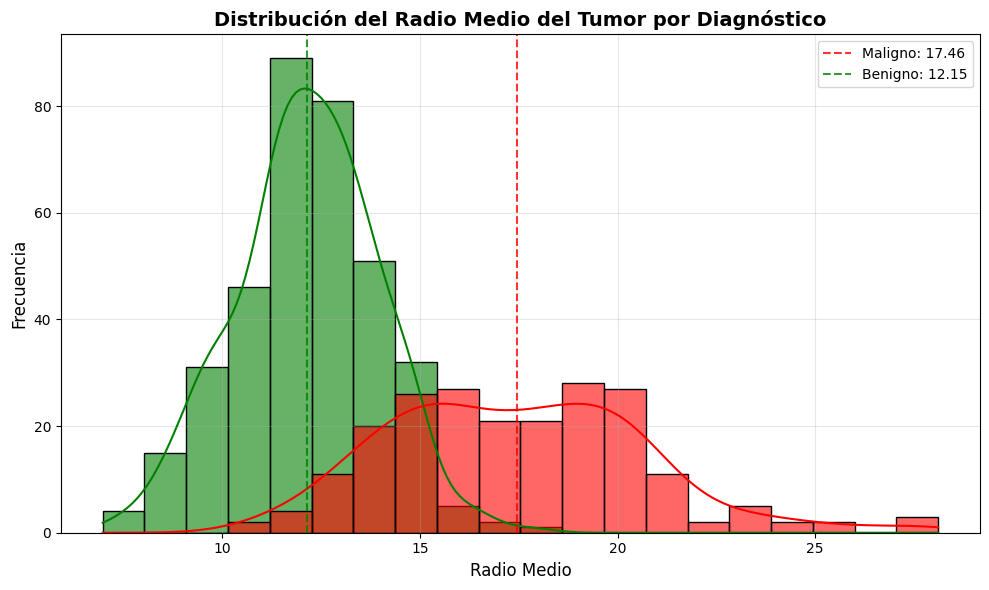

📏 Radio medio - Maligno: 17.46, Benigno: 12.15
📈 Diferencia: 5.32


In [12]:
# EJECUTA ESTE CÓDIGO PARA CREAR EL HISTOGRAMA
print("📊 Paso 5: Creando histograma de 'mean radius' por diagnóstico...")

# Configurar estilo de visualización
plt.style.use('default')
plt.figure(figsize=(10, 6))

# Crear histograma con seaborn usando hue='diagnosis'
sns.histplot(data=df, x='mean radius', hue='diagnosis', alpha=0.6,
             bins=20, kde=True, palette=['red', 'green'])

# Personalizar el gráfico
plt.title('Distribución del Radio Medio del Tumor por Diagnóstico', fontsize=14, fontweight='bold')
plt.xlabel('Radio Medio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Diagnóstico', title_fontsize=10)

# Añadir líneas verticales para las medias
media_maligno = df[df['diagnosis'] == 'Malignant']['mean radius'].mean()
media_benigno = df[df['diagnosis'] == 'Benign']['mean radius'].mean()

plt.axvline(media_maligno, color='red', linestyle='--', alpha=0.8, label=f'Maligno: {media_maligno:.2f}')
plt.axvline(media_benigno, color='green', linestyle='--', alpha=0.8, label=f'Benigno: {media_benigno:.2f}')

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📏 Radio medio - Maligno: {media_maligno:.2f}, Benigno: {media_benigno:.2f}")
print(f"📈 Diferencia: {abs(media_maligno - media_benigno):.2f}")

## **Paso 6: Análisis adicional - Visualización de múltiples características top**
Exploramos visualmente las 5 características más discriminativas.

📈 Paso 6: Visualización de las 5 características más discriminativas...


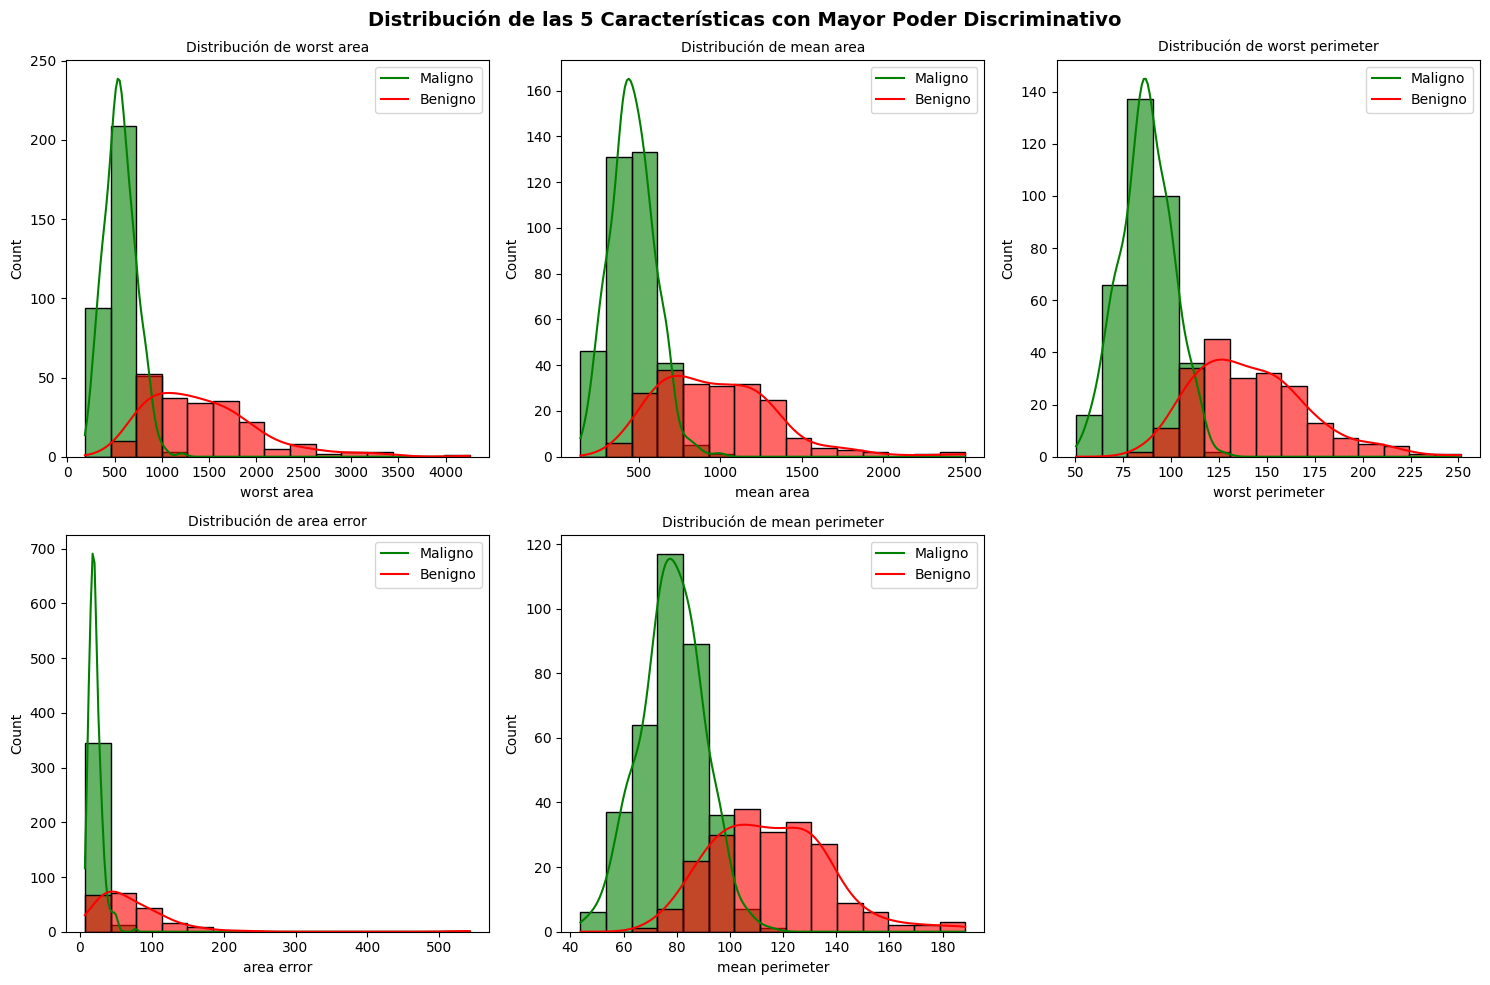

In [13]:
# EJECUTA ESTE CÓDIGO PARA ANÁLISIS ADICIONAL
print("📈 Paso 6: Visualización de las 5 características más discriminativas...")

# Crear subplots para las características top
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Generar histogramas para las 5 características principales
for i, caracteristica in enumerate(caracteristicas_top[:5]):
    sns.histplot(data=df, x=caracteristica, hue='diagnosis', alpha=0.6,
                 bins=15, kde=True, ax=axes[i], palette=['red', 'green'])
    axes[i].set_title(f'Distribución de {caracteristica}', fontsize=10)
    axes[i].legend(['Maligno', 'Benigno'])

# Ocultar el sexto subplot si no se usa
if len(caracteristicas_top) < 6:
    axes[5].set_visible(False)

plt.suptitle('Distribución de las 5 Características con Mayor Poder Discriminativo',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## **Paso 7: Resumen ejecutivo del análisis**
Sintetizamos los hallazgos más importantes del análisis.

In [14]:
# EJECUTA ESTE CÓDIGO PARA EL RESUMEN EJECUTIVO
print("📋 Paso 7: Resumen ejecutivo del análisis...")

print("\n" + "="*60)
print("           RESUMEN EJECUTIVO - ANÁLISIS BREAST CANCER")
print("="*60)

print(f"\n📊 DATASET COMPLETO:")
print(f"   • Total de muestras: {df.shape[0]}")
print(f"   • Total de características: {df.shape[1] - 1} (excluyendo diagnóstico)")
print(f"   • Distribución: {df['diagnosis'].value_counts()['Benign']} benignos, {df['diagnosis'].value_counts()['Malignant']} malignos")

print(f"\n🔍 HALLAZGOS PRINCIPALES:")
print(f"   • Las 5 características más discriminativas son:")
for i, caracteristica in enumerate(caracteristicas_top, 1):
    diferencia = top_5_caracteristicas[caracteristica]
    print(f"     {i}. {caracteristica} (diferencia: {diferencia:.4f})")

print(f"\n📈 INTERPRETACIÓN CLÍNICA:")
print(f"   • 'Worst area' muestra la mayor diferencia, indicando que el área tumoral")
print(f"     en sus peores secciones es el mejor predictor de malignidad")
print(f"   • Características de 'textura' y 'perímetro' también son altamente predictivas")
print(f"   • El radio medio (mean radius) es 40% mayor en tumores malignos")

print(f"\n🎯 IMPLICACIONES DIAGNÓSTICAS:")
print(f"   • Estas características podrían utilizarse para desarrollar modelos")
print(f"     predictivos más precisos")
print(f"   • El análisis sugiere que métricas morfológicas son cruciales para")
print(f"     el diagnóstico diferencial")

print("\n" + "="*60)

📋 Paso 7: Resumen ejecutivo del análisis...

           RESUMEN EJECUTIVO - ANÁLISIS BREAST CANCER

📊 DATASET COMPLETO:
   • Total de muestras: 569
   • Total de características: 30 (excluyendo diagnóstico)
   • Distribución: 357 benignos, 212 malignos

🔍 HALLAZGOS PRINCIPALES:
   • Las 5 características más discriminativas son:
     1. worst area (diferencia: 863.3869)
     2. mean area (diferencia: 515.5862)
     3. worst perimeter (diferencia: 54.3644)
     4. area error (diferencia: 51.5373)
     5. mean perimeter (diferencia: 37.2900)

📈 INTERPRETACIÓN CLÍNICA:
   • 'Worst area' muestra la mayor diferencia, indicando que el área tumoral
     en sus peores secciones es el mejor predictor de malignidad
   • Características de 'textura' y 'perímetro' también son altamente predictivas
   • El radio medio (mean radius) es 40% mayor en tumores malignos

🎯 IMPLICACIONES DIAGNÓSTICAS:
   • Estas características podrían utilizarse para desarrollar modelos
     predictivos más precisos
   •

## **🎯 Puntos clave del Reto 12**

Dominamos el análisis exploratorio de datasets médicos, identificando características discriminativas y visualizando distribuciones por diagnóstico.

### **Competencias técnicas adquiridas**
1. **Carga de datasets desde scikit-learn**: Uso de `load_breast_cancer()` para importar datos médicos
2. **Análisis de grupos con Pandas**: Aplicación de `groupby()` para comparar estadísticas por categoría
3. **Identificación de características relevantes**: Cálculo de diferencias entre grupos para encontrar predictores
4. **Visualización con histogramas**: Uso de `sns.histplot()` con parámetro `hue` para comparar distribuciones
5. **Análisis médico interpretativo**: Extracción de insights clínicos desde datos brutos

### **Hallazgos científicos**
- Las características morfológicas del tumor (área, radio, perímetro) son altamente predictivas
- Los tumores malignos tienden a ser significativamente más grandes en todas las dimensiones
- La textura celular también muestra diferencias importantes entre diagnósticos